In [1]:
import os, random
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from dGbyG.config import train_data_path
from dGbyG.utils.custom_tools import rapid_linear_reg

In [2]:
color1 = (100/256,170/256,220/256)
color2 = (241/256,183/256,39/256)
color3 = (162/256,205/256,133/256)
color4 = (256/256,130/256,210/256)
color5 = (139/256,139/256,255/256)

label_fs = 10
legend_fs = 10

In [3]:
def read_results(results_dir, N):
    # read the cross validation results files
    Final_p = []
    for n in range(N):
        name = os.path.join(results_dir, str(n))
        idx = np.load( name+'.npy').mean(axis=0).argmin()
        res = pd.read_csv(name+'.csv', index_col=0)
        try:
            real_r
        except:
            real_r = res.loc[:,'standard_dg_prime'].to_numpy()
        assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
        
        Final_p.append(res.loc[:,str(idx)].to_numpy())

    Final_p = np.asarray(Final_p)
    Final_e = Final_p - np.expand_dims(real_r, axis=0)
    Final_ae = np.abs(Final_e)

    return real_r, Final_p, Final_e, Final_ae

def calculate_statistics(real_r, Final_p):
    # 
    p = np.nanmean(Final_p, axis=0)
    e = p - real_r
    ae = np.abs(e)

    median_ae = np.nanmedian(ae)
    mean_ae = np.nanmean(ae)
    rmse = np.nanmean(ae**2)**0.5

    print('Medain of absolute error:', median_ae)
    print('Mean of absolute error:', mean_ae)
    print('RMSE:', rmse)

    return real_r, p


10-fold cross validation results

In [4]:
print('dGbyG 10-fold CV:')
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation/'
real_r, Final_p, Final_e, Final_ae = read_results(results_dir, 100)
real_r, p = calculate_statistics(real_r, Final_p)
#py, pr, sr = rapid_linear_reg(real_r, p)
print()

print('dGbyG 10-fold CV of unweighing:')
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_unweighing/'
real_r_unweigh, Final_p_unweigh, Final_e_unweigh, Final_ae_unweigh = read_results(results_dir, 100)
real_r_unweigh, p_unweigh = calculate_statistics(real_r_unweigh, Final_p_unweigh)
#py_unweigh, pr_unweigh, sr_unweigh = rapid_linear_reg(real_r_unweigh, p_unweigh)
print()

print('dGbyG 10-fold CV without random error:')
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_without_random_dG/'
real_r_no_rand, Final_p_no_rand, Final_e_no_rand, Final_ae_no_rand = read_results(results_dir, 100)
real_r_no_rand, p_no_rand = calculate_statistics(real_r_no_rand, Final_p_no_rand)
#py_no_rand, pr_no_rand, sr_no_rand = rapid_linear_reg(real_r_no_rand, p_no_rand)
print()

print('dGbyG 10-fold CV of unweighing and without random error:')
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_unweighing_without_random_dG/'
real_r_unweigh_no_rand, Final_p_unweigh_no_rand, Final_e_unweigh_no_rand, Final_ae_unweigh_no_rand = read_results(results_dir, 100)
real_r_unweigh_no_rand, p_unweigh_no_rand = calculate_statistics(real_r_unweigh_no_rand, Final_p_unweigh_no_rand)
#py_unweigh_no_rand, pr_unweigh_no_rand, sr_unweigh_no_rand = rapid_linear_reg(real_r, p)

dGbyG 10-fold CV:
Medain of absolute error: 4.114922286681738
Mean of absolute error: 9.176303647069096
RMSE: 25.88301495877343

dGbyG 10-fold CV of unweighing:
Medain of absolute error: 4.1548656037964555
Mean of absolute error: 9.006125081380704
RMSE: 25.991738989842275

dGbyG 10-fold CV without random error:
Medain of absolute error: 4.149462700000015
Mean of absolute error: 8.674818705608297
RMSE: 24.675103667821514

dGbyG 10-fold CV of unweighing and without random error:
Medain of absolute error: 4.2178460000000655
Mean of absolute error: 8.929575854514079
RMSE: 25.357022850582986


Fig 2. a

In [5]:
def resample_median(x, k, n):
    # randomly select k samples from x, repeating n times
    def resample(x, k):
        y = x[np.random.randint(0, x.shape[0], k)]
        y = np.mean(y, axis=0)
        return y
    e = np.array([resample(x, k) for _ in range(n)]) - real_r
    mae = np.median(np.abs(e), axis=1) # shape=(n,)
    return mae

k, n = 20, 5

data = [Final_p_unweigh_no_rand, Final_p_unweigh, Final_p_no_rand, Final_p]#
#data = [resample_median(x, k, n) for x in data]
data = [[np.median(np.abs(np.mean(x[i:i+k], axis=0)-real_r)) for i in range(n)] for x in data]

[4.196941362866349, 4.2167375128294555, 4.0958977847058575, 4.128876347433721]
0 1
LeveneResult(statistic=1.8111623286425327, pvalue=0.21526171343404138)
Ttest_indResult(statistic=-0.8860513255332859, pvalue=0.4014385757006076)

0 2
LeveneResult(statistic=3.040049967001689, pvalue=0.11939397247705257)
Ttest_indResult(statistic=3.6497487297164146, pvalue=0.006496724377186252)

0 3
LeveneResult(statistic=0.14297432590805406, pvalue=0.7151777604957334)
Ttest_indResult(statistic=4.031976598572219, pvalue=0.0037776553004447307)

1 2
LeveneResult(statistic=0.23589434277333715, pvalue=0.6402099236032895)
Ttest_indResult(statistic=3.62594718121186, pvalue=0.006724391980900484)

1 3
LeveneResult(statistic=0.6898273959400026, pvalue=0.43031079971489367)
Ttest_indResult(statistic=3.5028000845758642, pvalue=0.008045998024743558)

2 3
LeveneResult(statistic=1.5797408663709789, pvalue=0.24425229055226672)
Ttest_indResult(statistic=-1.101452473392952, pvalue=0.30273221635492464)



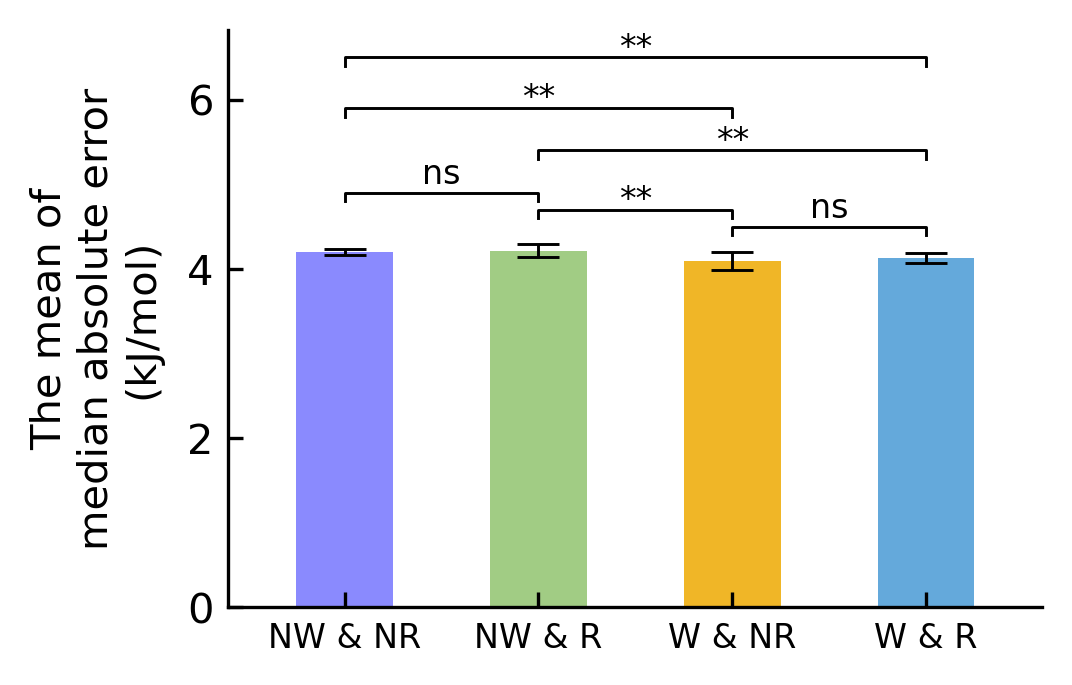

In [11]:
plt.figure(dpi=300,figsize = (3.5,2.5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

err_params=dict(elinewidth=0.7, ecolor='black', capsize=5, capthick=0.7)

height=[np.mean(x) for x in data]
yerr=[np.std(x)*1.96 for x in data]
print(height)

colors = [color5, color3, color2, color1]
labels = ['NW & NR', 'NW & R', 'W & NR', 'W & R']

plt.bar(x=[0,1,2,3],height=height, width=0.5, edgecolor='none', color=colors, 
        yerr=yerr, error_kw=err_params)


for x in range(len(data)):
    for y in range(x+1, len(data)):
        ttest = scipy.stats.ttest_ind(data[x], data[y])
        dh = 0.1
        if ttest[1]>=0.05:
            sign = 'ns'
            dh = 0.2
        elif ttest[1]>=0.01:
            sign = '*'
        elif ttest[1]>=0.001:
            sign = '**'
        else:
            sign = '***'
        print(x,y)
        print(scipy.stats.levene(data[x], data[y]))
        print(ttest)
        print()
        h = 4.8-x/5 if (y-x)==1 else 4.2-x/5*2.5+(y-x)*0.8-(y-x-2)*0.2

        plt.plot([x,x,y,y], [h,h+0.1,h+0.1,h], c='black', linewidth=0.7)
        plt.text(x=0.5*(y+x), y=h+dh, s=sign, fontsize=8, ha='center')

plt.xticks(ticks=[0,1,2,3], labels=labels, fontsize=8)
plt.yticks(fontsize=10)

plt.ylabel('The mean of\nmedian absolute error\n(kJ/mol)', fontsize=10, labelpad=6)

plt.xlim(-0.6,3.6)
plt.show()

The linear model is: Y = 0.99454 * X + -1.8518
PearsonRResult(statistic=0.9973365986965272, pvalue=0.0)
SignificanceResult(statistic=0.9308097362929517, pvalue=2.214542057331344e-296)


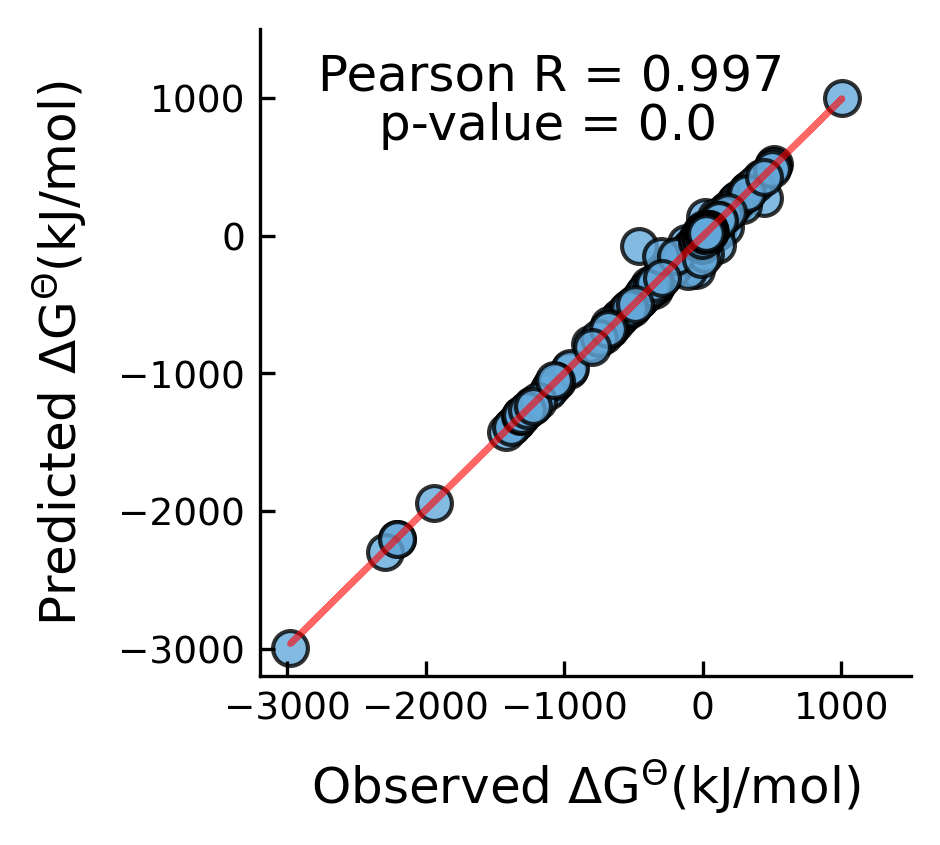

In [12]:
x = real_r
y = p
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.figure(dpi=300, figsize=(2.8,2.8))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
lable_fs = 17
title_fs = 20

plt.scatter(x, y, color=color1, marker='o', alpha=0.8, edgecolors='black', s=70)
plt.plot(x, fit_y,c = 'red',linewidth=1.6 , alpha = 0.6)

plt.text(x=-2780, y=1050, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 12)
plt.text(x=-2335, y=700, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 12)

plt.xticks(range(-3000, 1300, 1000), fontsize=9)
plt.yticks(range(-3000, 1300, 1000), fontsize=9)

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)

plt.ylim(-3200,1500)
plt.xlim(-3200,1500)
plt.show()

Reading the cross validation results data of CC method and AF method

In [13]:
# CC method
cc = pd.read_csv('../data/results_data/cc_and_af/cc_cross_validation_results.csv', index_col=0)
cc_r = cc['r']
cc_p = cc['LOOCV']
cc_e = cc_p-cc_r
cc_ae = np.abs(cc_e)
print('eQuilibrator:')
fit_y, pr, sr = rapid_linear_reg(cc_r, cc_p)
print('Medain of absolute error:', np.median(cc_ae))
print('Mean of absolute error:', np.mean(cc_ae))
print('RMSE:', np.mean(cc_ae**2)**0.5), print()

# AF method
af = pd.read_csv('../data/results_data/cc_and_af/af_cross_validation_results.csv', index_col=0)
af_r = af['r']
af_p = af['LOOCV']
af_e = af_p-af_r
af_ae = np.abs(af_e)
print('dGpredictor:')
fit_y, pr, sr = rapid_linear_reg(af_r, af_p)
print('Medain of absolute error:', np.median(af_ae))
print('Mean of absolute error:', np.mean(af_ae))
print('RMSE:', np.mean(af_ae**2)**0.5)

eQuilibrator:
The linear model is: Y = 0.99063 * X + 3.7417
PearsonRResult(statistic=0.9830227445687462, pvalue=0.0)
SignificanceResult(statistic=0.916444769913568, pvalue=1.727167078083592e-271)
Medain of absolute error: 5.325898869058361
Mean of absolute error: 19.455854675660056
RMSE: 82.8777119427084

dGpredictor:
The linear model is: Y = 0.99274 * X + 0.49928
PearsonRResult(statistic=0.9942639835605215, pvalue=0.0)
SignificanceResult(statistic=0.9106370386287613, pvalue=4.706066533365749e-262)
Medain of absolute error: 5.484989593132767
Mean of absolute error: 16.256106507029905
RMSE: 47.84693467009186


Fig 2.

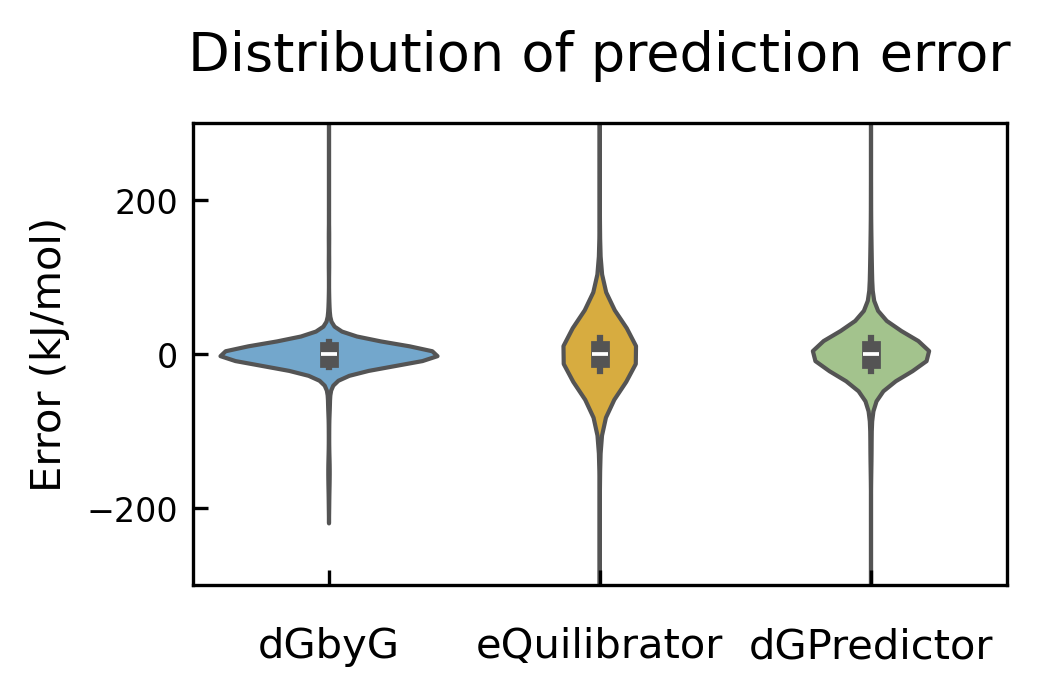

In [14]:
df1 = pd.DataFrame(data={'e':p-real_r, 'tool':'dGbyG'})
df2 = pd.DataFrame(data={'e':cc_e, 'tool':'eQuilibrator'})
df3 = pd.DataFrame(data={'e':af_e, 'tool':'dGPredictor'})
df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)

plt.figure(dpi=300,figsize = (3.5,2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax= plt.axes()
ax.xaxis.set_tick_params(pad=10)

plt.title(label='Distribution of prediction error', fontsize=13, x=0.5, y=1.06)
sns.violinplot(data=df, x='tool', y='e', hue='tool', palette=[color1, color2, color3], 
               bw_adjust=1.8, common_norm=True, linewidth=1, inner='box')
plt.yticks(fontsize = 8)
plt.xticks(ticks=[0,1,2],labels=['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize=10)

plt.ylabel('Error (kJ/mol)', fontsize=10)
plt.xlabel('')

plt.ylim(-300,300)
plt.show()

Fig 2.

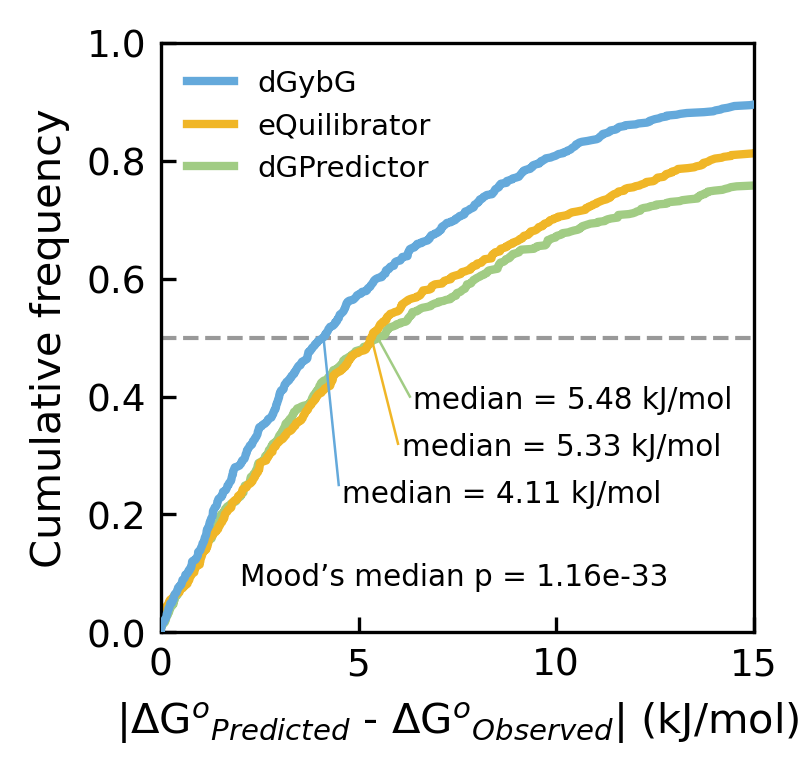

In [15]:
ae_sort = np.abs(p-real_r)#.to_numpy()
ae_sort.sort()
density = np.arange(1,len(ae_sort)+1)/len(ae_sort)

cc_ae_sort = cc_ae.to_numpy()
cc_ae_sort.sort()
cc_density = np.arange(1,len(cc_ae_sort)+1)/len(cc_ae_sort)

af_ae_sort = af_ae.to_numpy()
af_ae_sort.sort()
af_density = np.arange(1,len(af_ae_sort)+1)/len(af_ae_sort)

plt.figure(dpi=300, figsize=(2.55,2.55))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.title(label='Cumulative distributions of\nabsolute prediction error', fontsize=10, x=0.5, y=1.01)

# dgbyg
l0, = plt.plot(ae_sort, density, linewidth=2, c=color1, zorder = 3, label='dGybG')
plt.plot([np.median(ae_sort),4.5], [0.5,0.25], linewidth =0.6, color = color1, zorder=4)
plt.text(x=4.59, y = 0.22, s='median = {0} kJ/mol'.format(np.around(np.median(ae_sort), decimals=2)), fontsize=7.1)

# cc
l1, = plt.plot(cc_ae_sort, cc_density, linewidth=2, c=color2, zorder=2, label='eQuilibrator')
plt.plot([np.median(cc_ae),6], [0.5,0.32], linewidth=0.6, color=color2, zorder=4)
plt.text(x = 6.09, y = 0.30, s='median = {0} kJ/mol'.format(np.around(np.median(cc_ae_sort), decimals=2)), fontsize=7.1)

# dGPredictor
l2, = plt.plot(af_ae_sort, af_density, linewidth=2, c=color3, zorder = 1, label='dGPredictor')
plt.plot([np.median(af_ae),6.3], [0.5,0.40], linewidth =0.6, color = color3, zorder=4)
plt.text(x = 6.39, y = 0.38, s='median = {0} kJ/mol'.format(np.around(np.median(af_ae_sort), decimals=2)), fontsize=7.1)

p_value = scipy.stats.median_test(af_e, cc_ae, np.abs(p-real_r))[1]
plt.text(x=2, y=0.08, s='Mood’s median p = {0:.2e}'.format(p_value), fontsize=7.1)

plt.axhline(y=0.5, c = 'gray', linestyle = '--', linewidth=1., zorder=0, alpha=0.8)

plt.legend(handles=[l0,l1,l2], fontsize=7, frameon=False, handlelength=1.6)

plt.xlabel(r'|$\Delta$G$^{0}$$_{1}$ - $\Delta$G$^{0}$$_{2}$| (kJ/mol)'.format(chr(959),'{Predicted}', '{Observed}'), fontsize=10, labelpad=4)
plt.ylabel(r'Cumulative frequency', fontsize=10, labelpad=4)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(0,15)
plt.ylim(0,1)
plt.show()

Fig 3.

In [29]:
results_dir = '../data/results_data/cross_validation_results/5_fold_cross_validation/'
real_r_5, Final_p_5, Final_e_5, Final_ae_5 = read_results(results_dir, 20)
real_r_5, p_5 = calculate_statistics(real_r_5, Final_p_5)
py_5, pr_5, sr_5 = rapid_linear_reg(real_r_5, p_5)

Medain of absolute error: 4.1964276365077655
Mean of absolute error: 8.777830465990094
RMSE: 25.361118619022392
The linear model is: Y = 0.99461 * X + -1.8448
PearsonRResult(statistic=0.9974433767314574, pvalue=0.0)
SignificanceResult(statistic=0.9265248558553191, pvalue=6.3639523960539324e-288)


In [30]:
results_dir = '../data/results_data/cross_validation_results/2_fold_cross_validation/'
real_r_2, Final_p_2, Final_e_2, Final_ae_2 = read_results(results_dir, 20)
real_r_2, p_2 = calculate_statistics(real_r_2, Final_p_2)
py_2, pr_2, sr_2 = rapid_linear_reg(real_r_2, p_2)

Medain of absolute error: 5.016988999999967
Mean of absolute error: 10.106832240406911
RMSE: 26.321188780034376
The linear model is: Y = 0.99547 * X + -1.7415
PearsonRResult(statistic=0.9972454949694598, pvalue=0.0)
SignificanceResult(statistic=0.9134914115650207, pvalue=4.808301623312359e-265)


The linear model is: Y = 0.99454 * X + -1.8518
PearsonRResult(statistic=0.9973365986965272, pvalue=0.0)
SignificanceResult(statistic=0.9308097362929517, pvalue=2.214542057331344e-296)
The linear model is: Y = 0.99461 * X + -1.8448
PearsonRResult(statistic=0.9974433767314574, pvalue=0.0)
SignificanceResult(statistic=0.9265248558553191, pvalue=6.3639523960539324e-288)
The linear model is: Y = 0.99547 * X + -1.7415
PearsonRResult(statistic=0.9972454949694598, pvalue=0.0)
SignificanceResult(statistic=0.9134914115650207, pvalue=4.808301623312359e-265)
The linear model is: Y = 0.98876 * X + 2.6287
PearsonRResult(statistic=0.9813023382586797, pvalue=0.0)
SignificanceResult(statistic=0.8893179137320112, pvalue=3.066865039278118e-232)
The linear model is: Y = 0.97708 * X + 11.787
PearsonRResult(statistic=0.9730167348162169, pvalue=0.0)
SignificanceResult(statistic=0.8685354590939619, pvalue=1.4703327133294266e-208)
The linear model is: Y = -0.016704 * X + 20.491
PearsonRResult(statistic=-0.0751

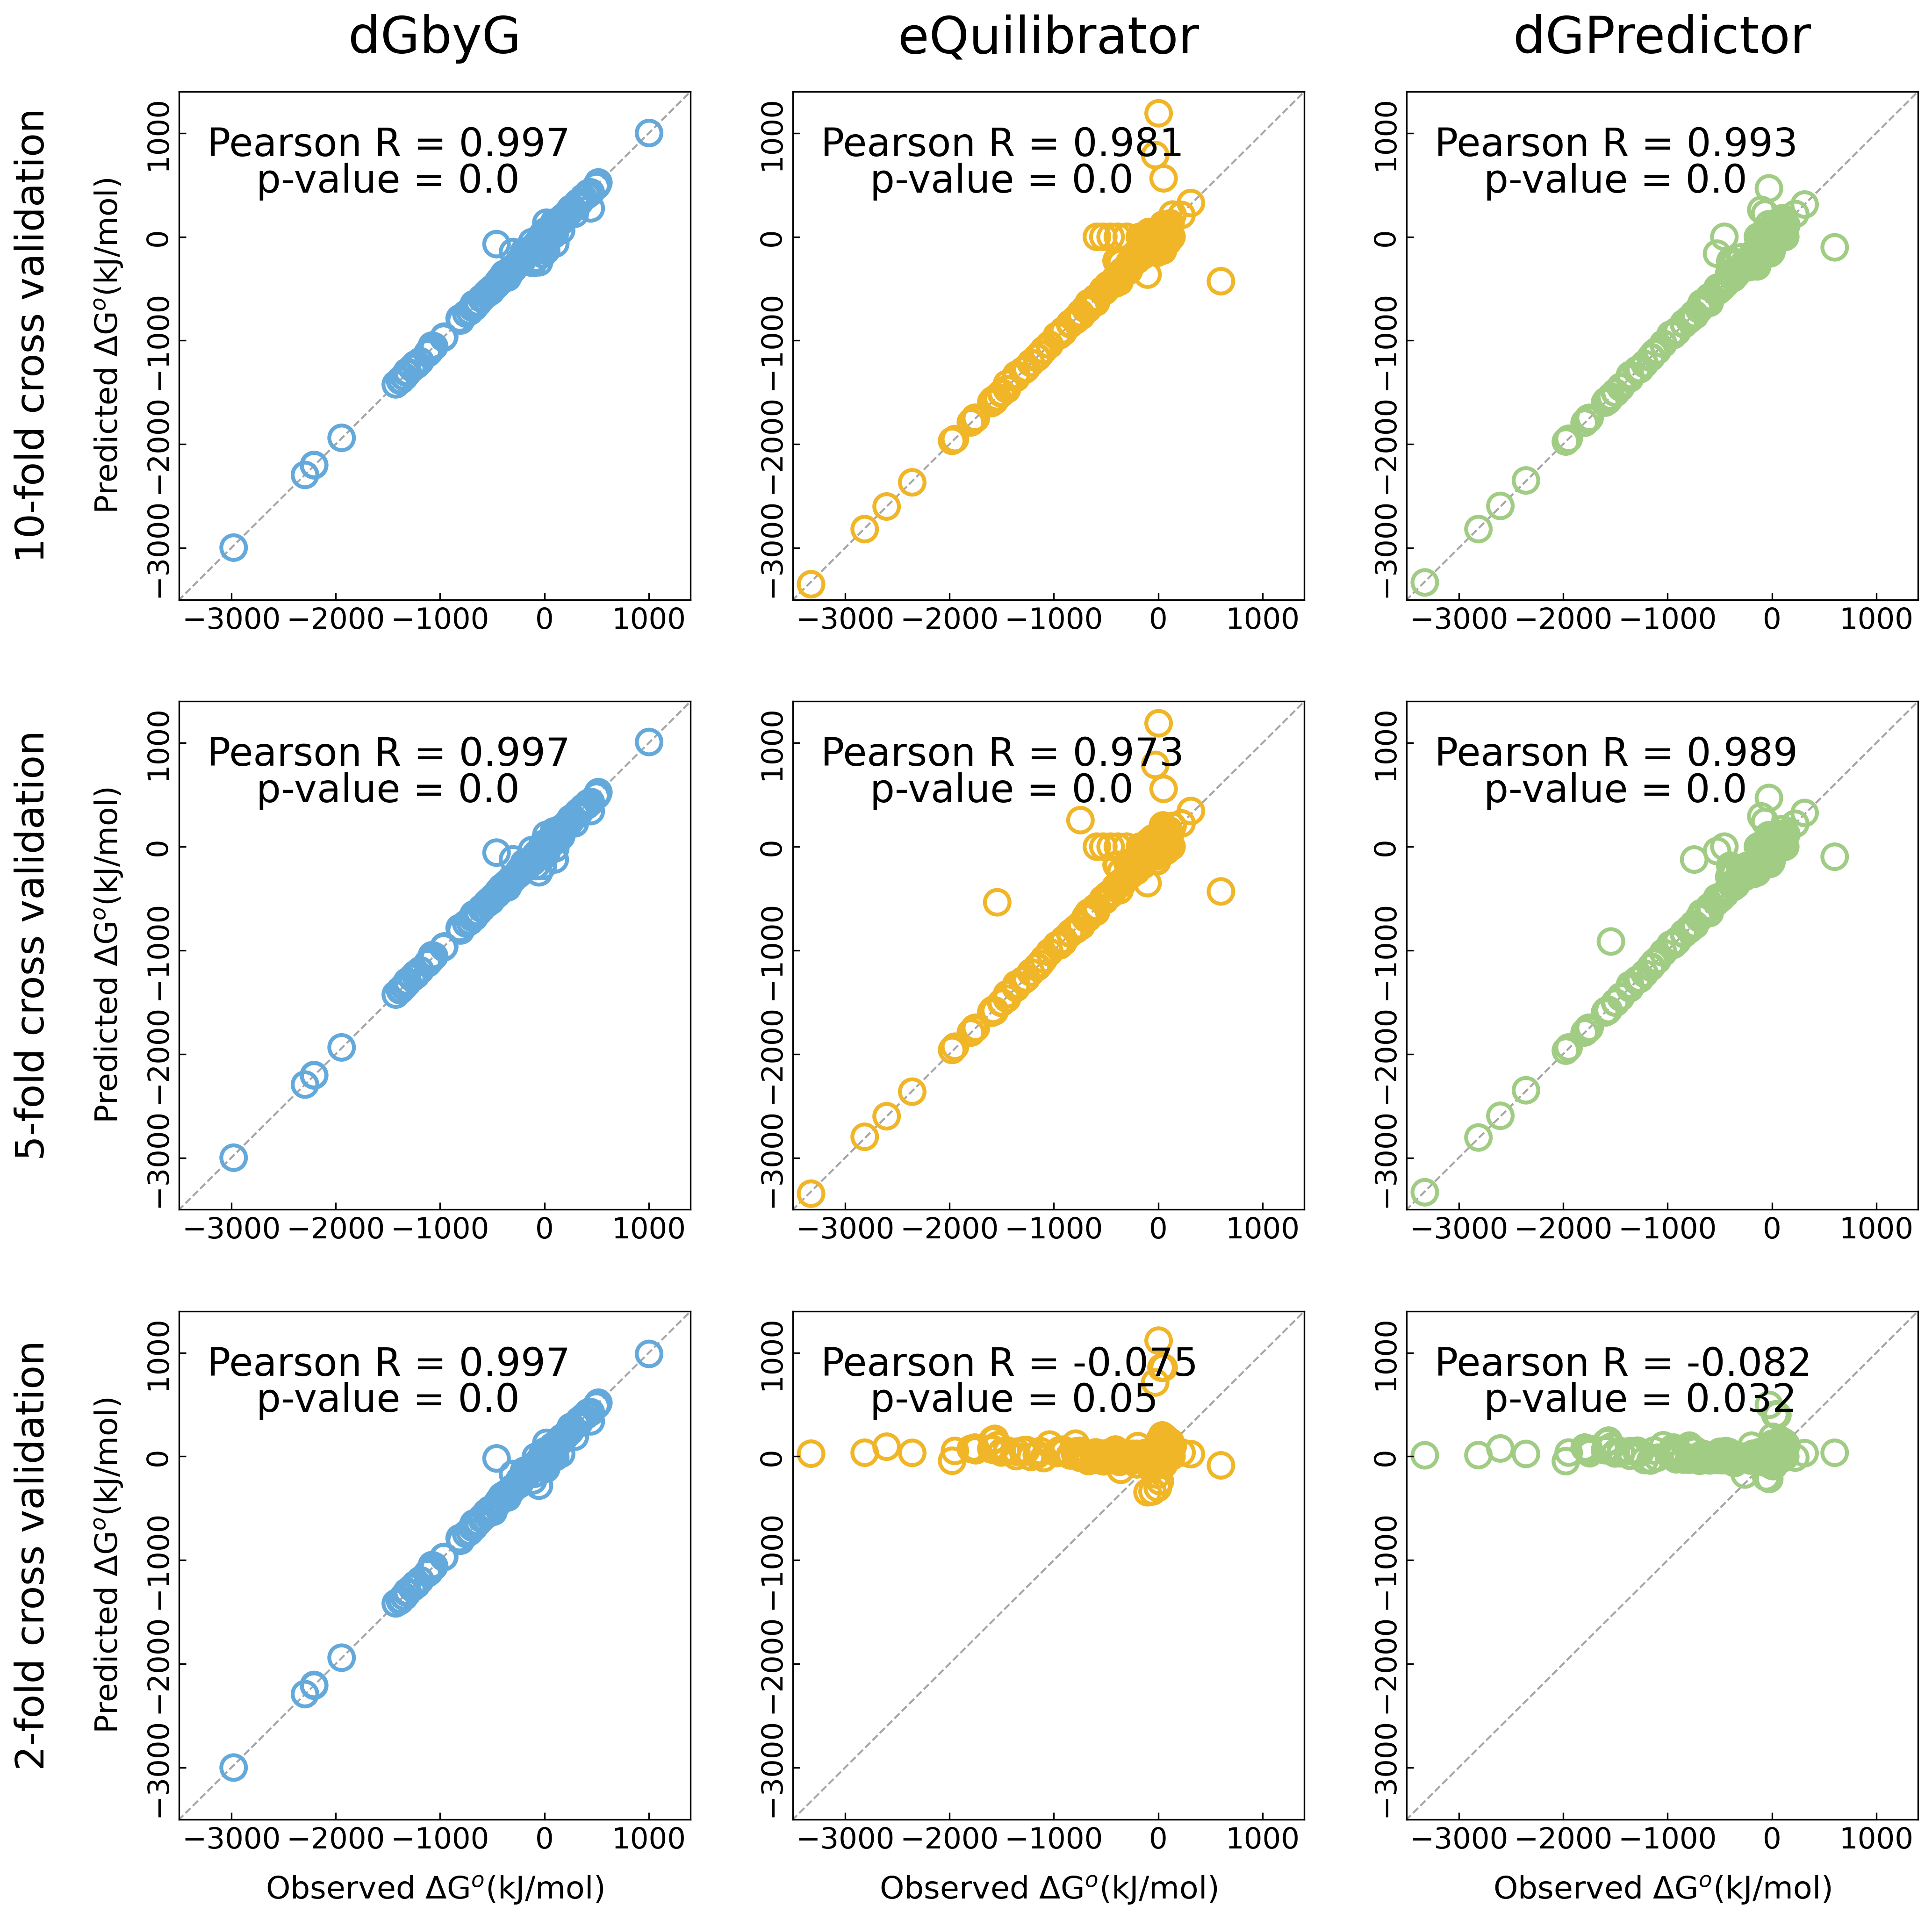

In [62]:
PR, SR = [], []

plt.figure(dpi=300,figsize = (16,16))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
lable_fs = 16
title_fs = 26
text_fs = 20
R_x, R_y = (-3230, 780)
P_x, P_y = (-2760, 430)
ticks_fs = 15

# dGbyG 10-fold
plt.subplot(3,3,1)
plt.title('dGbyG', fontsize=title_fs, fontweight='normal', pad=20)
plt.text(s='10-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal',rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p)

plt.scatter(x=real_r, y=p, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y, linewidth = 2, color='gray', alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')
(255/256,134/256,250/256)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize = ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(959)), fontsize=lable_fs, labelpad=10)

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])

# dGbyG 5-fold
plt.subplot(3,3,4)
plt.text(s='5-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_5)

plt.scatter(x=real_r, y=p_5, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(959)), fontsize=lable_fs, labelpad=10)

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])

# dGbyG 2-fold
plt.subplot(3,3,7)
plt.text(s='2-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_2)

plt.scatter(x=real_r, y=p_2, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(959)), fontsize=lable_fs, labelpad=10)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(959)), fontsize=lable_fs, labelpad=10)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])

# CC 10-fold
plt.subplot(3,3,2)
plt.title('eQuilibrator', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['10-fold CV'])

plt.scatter(x=cc_r, y=cc['10-fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])

# CC 5-fold CV
plt.subplot(3,3,5)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['5-fold CV'])

plt.scatter(x=cc_r, y=cc['5-fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])


# CC 2-fold CV
plt.subplot(3,3,8)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['2-fold CV'])

plt.scatter(x=cc_r, y=cc['2-fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(959)), fontsize=lable_fs, labelpad=10)

PR.append(pr[0]), SR.append(sr[0])


# AF 10-fold CV
plt.subplot(3,3,3)
plt.title('dGPredictor', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(af_r, af['10-fold CV'])

plt.scatter(x=af_r, y=af['10-fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(af_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])

# AF 5-fold CV
plt.subplot(3,3,6)

fit_y, pr, sr = rapid_linear_reg(af_r, af['5-fold CV'])

plt.scatter(x=af_r, y=af['5-fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

PR.append(pr[0]), SR.append(sr[0])


# AF 2-fold CV
plt.subplot(3,3,9)

fit_y, pr, sr = rapid_linear_reg(af_r, af['2-fold CV'])

plt.scatter(x=af_r, y=af['2-fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

#plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
#plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)
plt.text(x=R_x, y=R_y, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(959)), fontsize=lable_fs, labelpad=10)

PR.append(pr[0]), SR.append(sr[0])

plt.show()

EC cross validation

In [330]:
ec_res_dir = ['../data/results_data/cross_validation_results/EC{0}_cross_validation/'.format(ec) for ec in range(1,7)]
ec_res = [read_results(dir, 20) for dir in ec_res_dir]
real_r_ec = ec_res[0][0]
Final_p_ec = [np.nanmean(ec[1], axis=0) for ec in ec_res]
Final_e_ec = [x[~np.isnan(x)] for x in [np.nanmean(x[2], axis=0) for x in ec_res]]
Final_ae_ec = [np.abs(x) for x in Final_e_ec]
_ = calculate_statistics(real_r_ec, Final_p_ec)

Medain of absolute error: 7.143701592511743
Mean of absolute error: 18.561843651842636
RMSE: 29.50920519429042


/tmp/ipykernel_2011809/879742769.py:4: RuntimeWarning: Mean of empty slice
  Final_p_ec = [np.nanmean(ec[1], axis=0) for ec in ec_res]
/tmp/ipykernel_2011809/879742769.py:5: RuntimeWarning: Mean of empty slice
  Final_e_ec = [x[~np.isnan(x)] for x in [np.nanmean(x[2], axis=0) for x in ec_res]]
/tmp/ipykernel_2011809/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


In [355]:
# read EC cross validation results of CC and AF methods
cc_ec_df = pd.read_csv('../data/results_data/cc_and_af/cc_cross_validation_results_EC.csv', index_col=0)
cc_e_ec = [(x-cc_ec_df.loc[:,'r'].to_numpy())[~np.isnan(x)] for x in cc_ec_df.iloc[:,2:8].to_numpy().T]
cc_ae_ec = [np.abs(x) for x in cc_e_ec]

af_ec_df = pd.read_csv('../data/results_data/cc_and_af/af_cross_validation_results_EC.csv', index_col=0)
af_e_ec = [(x-af_ec_df.loc[:,'r'].to_numpy())[~np.isnan(x)] for x in af_ec_df.iloc[:,2:8].to_numpy().T]
af_ae_ec = [np.abs(x) for x in af_e_ec]

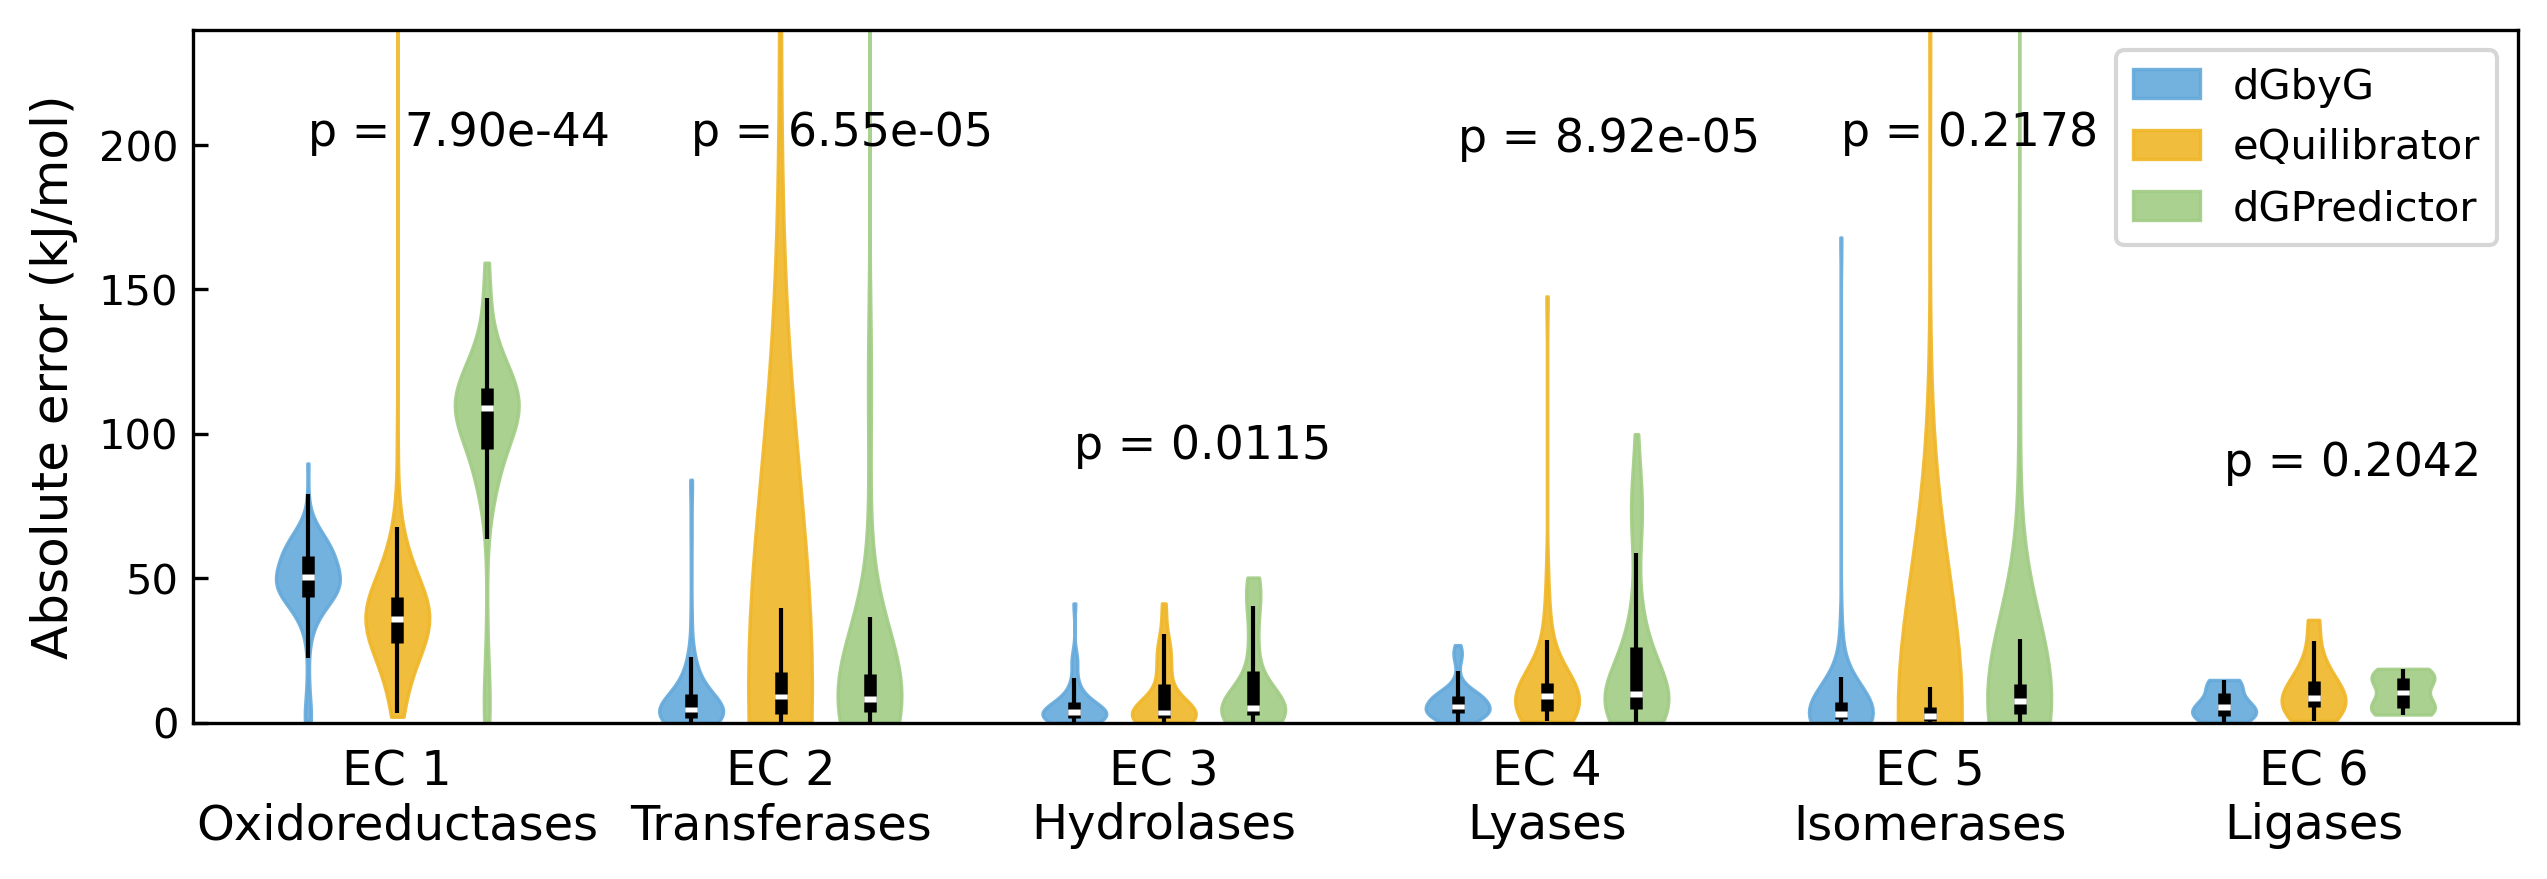

In [587]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, np.max(vals))

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, np.min(vals), q1)
    return lower_adjacent_value, upper_adjacent_value

ec_data = [Final_ae_ec, cc_ae_ec, af_ae_ec]

plt.figure(dpi=300,figsize = (10,3))
plt.rcParams['xtick.color'] = 'none'
plt.rcParams['xtick.labelcolor'] = 'black'
plt.rcParams['xtick.major.pad'] = 6

colors = [color1,color2,color3,]
width = 0.7

for i, dataset in enumerate(zip(*ec_data)):
    pos = 2+i*3 + np.array([-width,0,width])#pos+width*(i-1)
    pv = plt.violinplot(dataset, positions=pos, showextrema=False, )#bw_method=0.4, 
    for j, pb in enumerate(pv['bodies']):
        pb.set_facecolor(colors[j])
        pb.set_edgecolor(colors[j])
        pb.set_alpha(0.9), pb.set_linewidth(0.8)
        quartile1, medians, quartile3 = np.percentile(dataset[j], [25,50,75])
        whiskers_min, whiskers_max = adjacent_values(dataset[j], quartile1, quartile3)
        plt.vlines(pos[j], whiskers_min, whiskers_max, color='k', linestyles='-', lw=1)
        plt.vlines(pos[j], quartile1, quartile3, color='k', linestyles='-', lw=3)
        plt.vlines(pos[j], medians-1, medians+1, color='white', linestyles='-', lw=3)
    p = scipy.stats.alexandergovern(*dataset).pvalue
    p = str(np.round(p,4)) if p>=1e-4 else '{0:.2e}'.format(p)
    plt.text(x=pos[0], y=min(200, 50+np.max(dataset[1])), s='p = {0}'.format(p), fontsize=11)
    #print([len(x) for x in dataset], scipy.stats.ranksums(dataset[0], dataset[1])[1],scipy.stats.ranksums(dataset[0], dataset[2])[1])
    #print([len(x) for x in dataset], scipy.stats.levene(*dataset, center='mean')[1])
    #print([len(x) for x in dataset], scipy.stats.median_test(*dataset, )[1])


enzyme_class = ['Oxidoreductases', 'Transferases', 'Hydrolases', 'Lyases', 'Isomerases', 'Ligases']
plt.xticks(np.array(range(i+1))*3+2, labels=['EC '+str(n+1)+'\n{0}'.format(name) for n, name in enumerate(enzyme_class)],
           fontsize=11.5, )#rotation=45, anker='left'

plt.legend(labels =['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize=10, handlelength=1.6)

plt.ylabel('Absolute error (kJ/mol)', fontsize=12, labelpad=5)
plt.xlabel('')

plt.xlim(0.4,18.6)
plt.ylim(0,240)
plt.show()

Table 2

In [378]:
ec_mae_df = pd.DataFrame([[np.mean(np.abs(x)) for x in Final_ae_ec],
                          [np.mean(np.abs(x)) for x in cc_ae_ec],
                          [np.mean(np.abs(x)) for x in af_ae_ec]],
                          columns=['EC '+str(n) for n in range(1,7)],)
ec_mae_df.index = ['dGbyG', 'eQuilibrator', 'dGPredictor']
ec_mae_df.loc['DFT',:] = np.array([1.9,1.92,1.55,1.87,1.31,3.18]) * 4.184

In [379]:
ec_mae_df

,EC 1,EC 2,EC 3,EC 4,EC 5,EC 6
dGbyG,48.710267,9.192352,5.958292,7.332599,7.181751,6.492333
eQuilibrator,38.094154,60.196217,8.950402,13.010543,21.123256,12.047076
dGPredictor,102.286354,26.144078,13.504487,21.906584,19.764955,10.412805
DFT,7.949600,8.033280,6.485200,7.824080,5.481040,13.305120


other figures

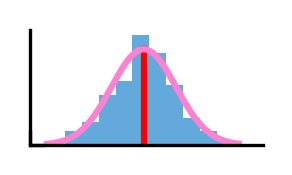

In [ ]:
from scipy.stats import norm
ps = Final_p.T[600]

plt.figure(dpi=300, figsize=(1,0.5))
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(ps, bins=10, density=True, color=color1)

interval = ps.std()*6
x = np.array([interval/100*i + (ps.mean()-interval/2) for i in range(100)])
y = norm.pdf(x ,ps.mean(), ps.std())

plt.plot([ps.mean(),ps.mean()], [0,max(y)], color='red')
plt.plot(x, y, color=color4, alpha=1)

plt.xticks([-30], [None])
plt.yticks([0], [None])
plt.xlim(-30,-19)
plt.show()

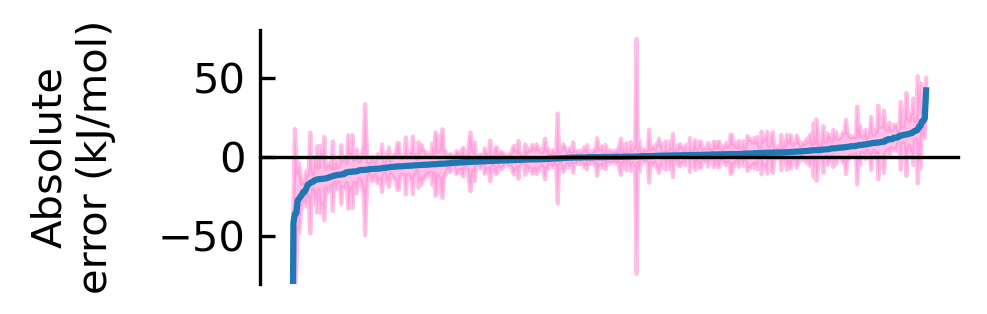

0.8915929203539823


In [38]:
df = pd.DataFrame(data=[real_r.to_numpy(), p, p-real_r, np.std(Final_p, axis=0), np.std(R, axis=0)]).T.iloc[223:,:]
df = df.sort_values(by=2)

plt.figure(dpi=300, figsize=(3,1.1))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))


plt.plot(range(df.shape[0]), df.iloc[:,2])
#plt.plot(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+10, color=color4)
#plt.plot(range(df.shape[0]), df.iloc[:,2]-df.iloc[:,3]*2-10, color=color3)
plt.fill_between(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+df.iloc[:,4]*2, df.iloc[:,2]-df.iloc[:,3]*2-df.iloc[:,4]*2,color=color4, alpha=0.5)

plt.ylabel('Absolute\nerror (kJ/mol)'.format(chr(920)), fontsize=10, labelpad=10)

plt.ylim(-80,80)
plt.xticks([])
plt.show()

print(sum(abs(df.iloc[:,2]<=df.iloc[:,3]*2+df.iloc[:,4]*2))/df.shape[0])